In [4]:
import numpy as np  
import pandas as pd
!pip install --user pandas_datareader
!pip install --upgrade pandas_datareader

You are using pip version 19.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: pandas_datareader in /Users/niecong/.local/lib/python3.7/site-packages (0.8.1)
You are using pip version 19.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [6]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [7]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,PG
Date,
2019-10-15,-0.024027
2019-10-16,0.002812
2019-10-17,-0.001320
2019-10-18,0.007176
2019-10-21,0.008139


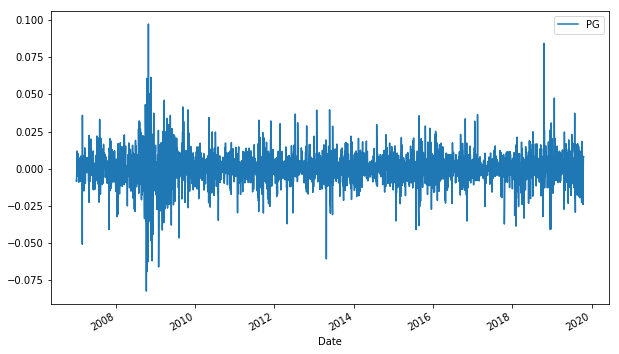

In [8]:
log_returns.plot(figsize = (10, 6))

In [9]:
u = log_returns.mean()
u

PG    0.000309
dtype: float64

In [10]:
var = log_returns.var()
var

PG    0.00012
dtype: float64

In [12]:
var = log_returns.var()
var

PG    0.00012
dtype: float64

In [13]:
drift = u - (0.5 * var)
drift

PG    0.000249
dtype: float64

In [14]:
stdev = log_returns.std()
stdev

PG    0.010972
dtype: float64

In [15]:
type(drift)

pandas.core.series.Series

In [16]:
type(stdev)

pandas.core.series.Series

In [17]:
np.array(drift)

array([0.00024928])

In [18]:
drift.values

array([0.00024928])

In [19]:
stdev.values

array([0.01097205])

In [20]:
norm.ppf(0.95)

1.6448536269514722

In [21]:
x = np.random.rand(10, 2)
x

array([[0.20993722, 0.51587839],
       [0.32177381, 0.34929083],
       [0.33736821, 0.94145171],
       [0.93208035, 0.90559866],
       [0.09655245, 0.77377681],
       [0.00556423, 0.02907118],
       [0.75375673, 0.39567993],
       [0.66552178, 0.60744564],
       [0.06703221, 0.97977047],
       [0.60044441, 0.29491926]])

In [23]:
t_intervals = 1000
iterations = 10

In [24]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [25]:
daily_returns

array([[0.99554443, 1.00305983, 1.0153594 , ..., 1.00364947, 1.00328636,
        1.0100665 ],
       [0.98630781, 1.03032793, 0.99537449, ..., 1.0044928 , 1.02556393,
        0.98997001],
       [1.0162966 , 1.00792202, 1.02223796, ..., 1.0176798 , 1.00489429,
        1.01578378],
       ...,
       [0.9980085 , 0.99440866, 0.98829813, ..., 0.99640216, 0.99085952,
        1.00595296],
       [0.99328454, 0.98893364, 1.00646338, ..., 1.00713858, 0.99624785,
        0.98258096],
       [1.02821085, 1.01010189, 0.99578026, ..., 0.98867652, 0.99968059,
        1.00728043]])

In [26]:
S0 = data.iloc[-1]
S0

PG    118.43
Name: 2019-10-21 00:00:00, dtype: float64

In [27]:
price_list = np.zeros_like(daily_returns)

In [28]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
price_list[0] = S0
price_list

array([[118.43000031, 118.43000031, 118.43000031, ..., 118.43000031,
        118.43000031, 118.43000031],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [31]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [32]:
price_list

array([[118.43000031, 118.43000031, 118.43000031, ..., 118.43000031,
        118.43000031, 118.43000031],
       [116.80843414, 122.02173695, 117.88220108, ..., 118.96208237,
        121.4575368 , 117.24214869],
       [118.71201449, 122.98839535, 120.50366074, ..., 121.06530769,
        122.05198498, 119.09267259],
       ...,
       [171.35198166,  83.92245894, 153.77505255, ..., 108.34177767,
        134.60809259, 132.69963393],
       [170.20127486,  82.99374316, 154.76895881, ..., 109.11518465,
        134.10302271, 130.38813384],
       [175.00279748,  83.8321368 , 154.11587336, ..., 107.87962133,
        134.06018826, 131.33741535]])

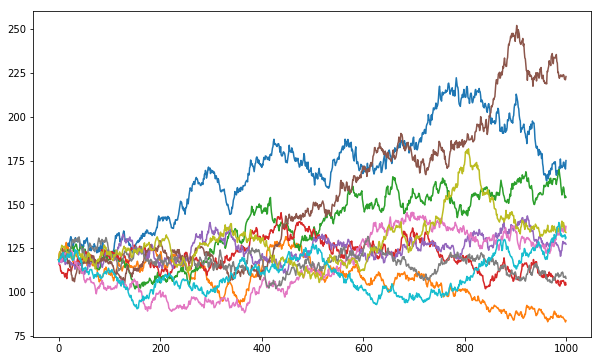

In [33]:
plt.figure(figsize=(10,6))
plt.plot(price_list);